In [1]:
import pandas as pd
import numpy as np
import requests
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import re

In [2]:
# Load Truth Social Data
url = "https://stilesdata.com/trump-truth-social-archive/truth_archive.json"
response = requests.get(url)
truth_data = response.json()

df_truth = pd.DataFrame(truth_data)
print(f"Total posts: {len(df_truth)}")
df_truth.head()

Total posts: 29409


,id,created_at,content,url,media,replies_count,reblogs_count,favourites_count
0,115437112529618205,2025-10-25T22:15:50.076Z,"I am on my way to Malaysia, where I will sign ...",https://truthsocial.com/@realDonaldTrump/11543...,[],1134.0,3088.0,12468.0
1,115436984200406691,2025-10-25T21:43:11.929Z,"RT @realDonaldTrumpCanada was caught, red hand...",https://truthsocial.com/@realDonaldTrump/11543...,[],0.0,0.0,1.0
2,115436968622280698,2025-10-25T21:39:14.264Z,https://www.dailysignal.com/2025/10/22/trumps-...,https://truthsocial.com/@realDonaldTrump/11543...,[],302.0,1582.0,6018.0
3,115436967550742005,2025-10-25T21:38:57.913Z,https://www.foxnews.com/opinion/new-high-tech-...,https://truthsocial.com/@realDonaldTrump/11543...,[],214.0,1515.0,5878.0
4,115436966353094571,2025-10-25T21:38:39.636Z,https://www.foxnews.com/politics/scoop-trumps-...,https://truthsocial.com/@realDonaldTrump/11543...,[],211.0,1756.0,6224.0


In [3]:
# Clean Truth Social Data
df_truth['timestamp'] = pd.to_datetime(df_truth['created_at'])
df_truth['date'] = df_truth['timestamp'].dt.date

# Basic text cleaning
def clean_text(text):
    if pd.isna(text):
        return ""
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
     # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    text = text.strip()
    return text

df_truth['cleaned_content'] = df_truth['content'].apply(clean_text)

# Remove empty posts
df_truth = df_truth[df_truth['cleaned_content'] != ""]
print(f"Posts after cleaning: {len(df_truth)}")
df_truth.head()

Posts after cleaning: 18778


,id,created_at,content,url,media,replies_count,reblogs_count,favourites_count,timestamp,date,cleaned_content
0,115437112529618205,2025-10-25T22:15:50.076Z,"I am on my way to Malaysia, where I will sign ...",https://truthsocial.com/@realDonaldTrump/11543...,[],1134.0,3088.0,12468.0,2025-10-25 22:15:50.076000+00:00,2025-10-25,"I am on my way to Malaysia, where I will sign ..."
1,115436984200406691,2025-10-25T21:43:11.929Z,"RT @realDonaldTrumpCanada was caught, red hand...",https://truthsocial.com/@realDonaldTrump/11543...,[],0.0,0.0,1.0,2025-10-25 21:43:11.929000+00:00,2025-10-25,"RT @realDonaldTrumpCanada was caught, red hand..."
8,115436697060819133,2025-10-25T20:30:10.525Z,"Canada was caught, red handed, putting up a fr...",https://truthsocial.com/@realDonaldTrump/11543...,[],401.0,831.0,2715.0,2025-10-25 20:30:10.525000+00:00,2025-10-25,"Canada was caught, red handed, putting up a fr..."
9,115436558661444946,2025-10-25T19:54:58.713Z,We have a very strong PEACE in the Middle East...,https://truthsocial.com/@realDonaldTrump/11543...,[],470.0,1314.0,4887.0,2025-10-25 19:54:58.713000+00:00,2025-10-25,We have a very strong PEACE in the Middle East...
11,115436151669143136,2025-10-25T18:11:28.545Z,Congressman Jimmy Patronis is a MAGA Warrior w...,https://truthsocial.com/@realDonaldTrump/11543...,[],313.0,1260.0,5237.0,2025-10-25 18:11:28.545000+00:00,2025-10-25,Congressman Jimmy Patronis is a MAGA Warrior w...


In [4]:
# Load QQQ Market Data
qqq = yf.download('QQQ', start='2022-01-01', end=datetime.now().strftime('%Y-%m-%d'))

# Flatten column names
if isinstance(qqq.columns, pd.MultiIndex):
    qqq.columns = [col[0] for col in qqq.columns]

# Calculate daily returns
qqq['Returns'] = qqq['Close'].pct_change() * 100

print(f"Market data from {qqq.index[0]} to {qqq.index[-1]}")
qqq.head()

/var/folders/xq/pddn9j1n1wq71m29wwc_vjrh0000gn/T/ipykernel_17366/2817354723.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  qqq = yf.download('QQQ', start='2022-01-01', end=datetime.now().strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed

Market data from 2022-01-03 00:00:00 to 2025-11-13 00:00:00


,Close,High,Low,Open,Volume,Returns
Date,,,,,,
2022-01-03,392.184082,392.437945,387.497568,389.616252,40575900,NaN
2022-01-04,387.097351,392.769999,383.992534,392.730936,58027200,-1.297026
2022-01-05,375.205261,386.531039,374.951398,385.408202,75739800,-3.072119
2022-01-06,374.941559,378.192853,371.143536,373.379407,70814300,-0.070282
2022-01-07,370.879913,376.640458,369.102962,374.951346,72652300,-1.083274


In [5]:
# Align Data by Date

# Count posts per day
daily_posts = df_truth.groupby('date').size().reset_index(name='post_count')
daily_posts['date'] = pd.to_datetime(daily_posts['date'])

# Merge with market data
qqq_reset = qqq.reset_index()
qqq_reset['date'] = pd.to_datetime(qqq_reset['Date']).dt.date
daily_posts['date'] = daily_posts['date'].dt.date

combined_df = pd.merge(qqq_reset, daily_posts, on='date', how='left')
combined_df['post_count'] = combined_df['post_count'].fillna(0)

print(f"Combined dataset: {len(combined_df)} days")
combined_df.head()

Combined dataset: 971 days


,Date,Close,High,Low,Open,Volume,Returns,date,post_count
0,2022-01-03,392.184082,392.437945,387.497568,389.616252,40575900,NaN,2022-01-03,0.0
1,2022-01-04,387.097351,392.769999,383.992534,392.730936,58027200,-1.297026,2022-01-04,0.0
2,2022-01-05,375.205261,386.531039,374.951398,385.408202,75739800,-3.072119,2022-01-05,0.0
3,2022-01-06,374.941559,378.192853,371.143536,373.379407,70814300,-0.070282,2022-01-06,0.0
4,2022-01-07,370.879913,376.640458,369.102962,374.951346,72652300,-1.083274,2022-01-07,0.0


In [6]:
# Save cleaned data
df_truth.to_csv('truth_social_cleaned.csv', index=False)
combined_df.to_csv('combined_data.csv', index=False)

print("Data saved successfully!")

Data saved successfully!


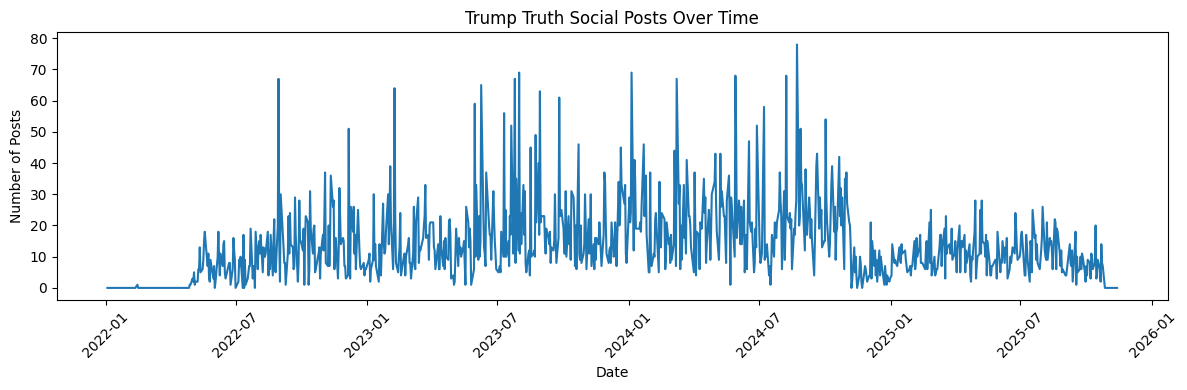

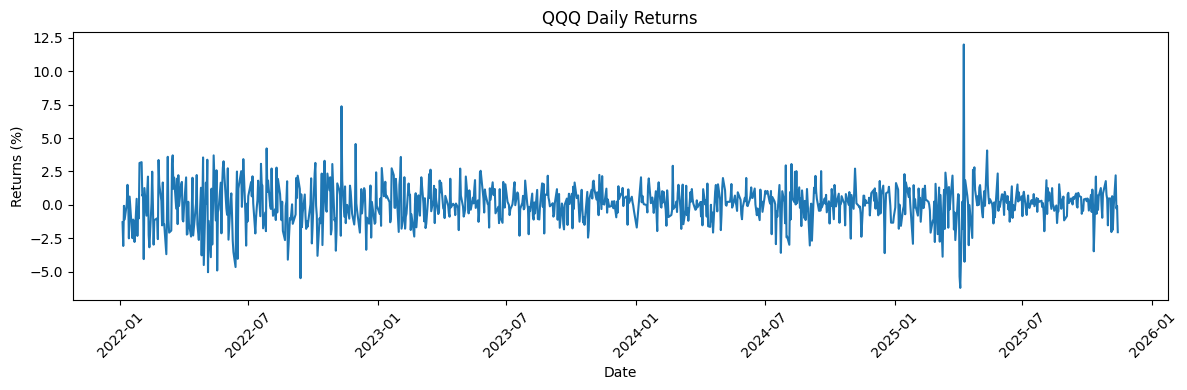

In [7]:
# Posts over time
plt.figure(figsize=(12, 4))
plt.plot(combined_df['date'], combined_df['post_count'])
plt.title('Trump Truth Social Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# QQQ returns
plt.figure(figsize=(12, 4))
plt.plot(combined_df['date'], combined_df['Returns'])
plt.title('QQQ Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()